# A2.1 Text Processing & Zipf’s Law

## Step 1

We perform tokenization with `nltk.TreebankWordTokenizer` on the whole corpus, the government genre and the humor genre.

A `Counter` is applied instead of a explicit sorted word list.

In [85]:
import re
from typing import Dict, List, Tuple, Iterable

import nltk
from nltk.corpus import brown
from collections import Counter
from nltk.tokenize import TreebankWordTokenizer, PunktSentenceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

brown_categories = brown.categories()
brown_fileds = brown.fileids()
#print(brown_categories)

brown_raw = ' '.join(brown.words())
brown_humor_raw = ' '.join(brown.words(categories="humor"))
brown_gov_raw = ' '.join(brown.words(categories="government"))

sent_tokenizer = PunktSentenceTokenizer()
brown_sents = sent_tokenizer.tokenize(brown_raw)
brown_humor_sents = sent_tokenizer.tokenize(brown_humor_raw)
brown_gov_sents = sent_tokenizer.tokenize(brown_gov_raw)

word_tokenizer = TreebankWordTokenizer()
brown_tokens = word_tokenizer.tokenize(brown_raw)
brown_humor_tokens = word_tokenizer.tokenize(brown_humor_raw)
brown_gov_tokens = word_tokenizer.tokenize(brown_gov_raw)

token_counter = Counter(brown_tokens)
humor_token_counter = Counter(brown_humor_tokens)
gov_token_counter = Counter(brown_gov_tokens)


punctuations = set(re.sub('[a-zA-Z\d]', '', brown_raw).split()).union(set(word_tokenizer.tokenize(re.sub('[a-zA-Z\d]', '', brown_raw)))).union(set(re.sub('[a-zA-Z\d]', '', brown_raw)))
def remove_puncs(counter: Dict[str, int], punctuations: Iterable[str] = punctuations) -> Dict[str, int]:
    counter_copy = counter.copy()
    for punc in punctuations:
        counter_copy.pop(punc, None)
    return counter_copy

brown_word_counter = remove_puncs(token_counter)
humor_word_counter = remove_puncs(humor_token_counter)
gov_word_counter = remove_puncs(gov_token_counter)

print(brown_word_counter.most_common(20))
print(humor_word_counter.most_common(20))
print(gov_word_counter.most_common(20))



[('the', 62713), ('of', 36080), ('and', 27915), ('to', 25732), ('a', 21888), ('in', 19536), ('that', 10328), ('is', 10100), ('was', 9924), ('for', 8841), ('The', 7258), ('with', 7012), ('it', 6877), ('he', 6717), ('as', 6706), ('his', 6466), ('on', 6395), ('be', 6344), ("'s", 5865), ('I', 5840)]
[('the', 930), ('of', 515), ('and', 512), ('a', 505), ('to', 463), ('in', 334), ('was', 282), ('I', 260), ('that', 242), ('it', 168), ('had', 152), ('for', 150), ('he', 149), ('you', 145), ('his', 137), ("'s", 134), ('with', 129), ('on', 128), ('is', 121), ('as', 116)]
[('the', 4143), ('of', 3031), ('and', 1923), ('to', 1829), ('in', 1319), ('a', 867), ('for', 806), ('is', 649), ('be', 600), ('that', 489), ('The', 478), ('as', 453), ('by', 428), ('are', 415), ('on', 401), ('or', 399), ('with', 358), ('this', 344), ('which', 263), ('from', 244)]


## Step 2

In [91]:

def get_token_num(counter: Dict[str, int]) -> int:
    return sum(counter.values())

def get_type_num(counter: Dict[str, int]) -> int:
    return len(counter)

def get_word_num(counter: Dict[str, int], punctuations: Iterable[str] = punctuations) -> int:
    counter_copy = counter.copy()
    for punc in punctuations:
        counter_copy.pop(punc, None)
    return sum(counter_copy.values())

def get_word_per_sent(sents: List[List[str]], punctuations: Iterable[str] = punctuations) -> float:
    len_sum = sum(map(lambda sent: len([token for token in sent if token not in punctuations]), sents))
    return len_sum / len(sents)

def get_avg_word_length(counter: Dict[str, int], punctuations: Iterable[str] = punctuations) -> float:
    counter_copy = counter.copy()
    for punc in punctuations:
        counter_copy.pop(punc, None)
    word_num = sum(counter_copy.values())
    sum_word_length = sum(map(lambda word2freq: len(word2freq[0]) * word2freq[1], counter_copy.items()))
    return sum_word_length / word_num

def get_lemma_num(token_with_pos: List[Tuple[str, str]], lemmatizer = WordNetLemmatizer()):
    pos2type = {'N':'n', 'V': 'v', 'R': 'r', 'J': 'a'} # when use this dict always use get to set default as 'n' as default.
    lemma_set = set(lemmatizer.lemmatize(token, pos2type.get(p[0].lower(), 'n')) for token, p in token_with_pos)
    return len(lemma_set)

# (i) number of tokens
num_token_brown = get_token_num(token_counter)
num_token_humor = get_token_num(humor_token_counter)
num_token_gov = get_token_num(gov_token_counter)

# (ii) number of types
num_type_brown = get_type_num(token_counter)
num_type_humor = get_type_num(humor_token_counter)
num_type_gov = get_type_num(gov_token_counter)

# (iii) number of words
num_word_brown = get_word_num(token_counter)
num_word_humor= get_word_num(humor_token_counter)
num_word_gov = get_word_num(gov_token_counter)

# (iv) average number of words per sentence
avg_word_per_sent_brown = get_word_per_sent(brown.sents())
avg_word_per_sent_humor = get_word_per_sent(brown.sents(categories="humor"))
avg_word_per_sent_gov = get_word_per_sent(brown.sents(categories="government"))

# (v) average word length
avg_word_len_brown = get_avg_word_length(token_counter)
avg_word_len_humor = get_avg_word_length(humor_token_counter)
avg_word_len_gov = get_avg_word_length(gov_token_counter)

# (vi) number of lemmas
token_with_pos_brown = pos_tag(brown_tokens)
token_with_pos_humor = pos_tag(brown_humor_tokens)
token_with_pos_gov = pos_tag(brown_gov_tokens)
lemma_num_brown = get_lemma_num(token_with_pos_brown)
lemma_num_humor = get_lemma_num(token_with_pos_humor)
lemma_num_gov = get_lemma_num(token_with_pos_gov)



In [92]:
VERBOSE =True

if VERBOSE:
    print(f"In the Whole Brown Corpus: ")
    print(f"Number of Tokens: {num_token_brown}")
    print(f"Number of Types: {num_type_brown}")
    print(f"Number of Words: {num_word_brown}")
    print(f"Average Number of Words Per Sentence: {avg_word_per_sent_brown}")
    print(f"Average Length of Words: {avg_word_len_brown}")
    print(f"Number of Lemmas: {lemma_num_brown}")
    print("---------------------------------------------------------------")
    
    print(f"In the Humor Genre: ")
    print(f"Number of Tokens: {num_token_humor}")
    print(f"Number of Types: {num_type_humor}")
    print(f"Number of Words: {num_word_humor}")
    print(f"Average Number of Words Per Sentence: {avg_word_per_sent_humor}")
    print(f"Average Length of Words: {avg_word_len_humor}")
    print(f"Number of Lemmas: {lemma_num_humor}")
    print("---------------------------------------------------------------")
    
    print(f"In the Government Genre: ")
    print(f"Number of Tokens: {num_token_gov}")
    print(f"Number of Types: {num_type_gov}")
    print(f"Number of Words: {num_word_gov}")
    print(f"Average Number of Words Per Sentence: {avg_word_per_sent_gov}")
    print(f"Average Length of Words: {avg_word_len_gov}")
    print(f"Number of Lemmas: {lemma_num_gov}")
    print("---------------------------------------------------------------")

In the Whole Brown Corpus: 
Number of Tokens: 1172683
Number of Types: 53759
Number of Words: 1023269
Average Number of Words Per Sentence: 17.672131147540984
Average Length of Words: 4.686300474264343
Number of Lemmas: 48917
---------------------------------------------------------------
In the Humor Genre: 
Number of Tokens: 21976
Number of Types: 4934
Number of Words: 18546
Average Number of Words Per Sentence: 17.35517568850902
Average Length of Words: 4.497573600776448
Number of Lemmas: 4675
---------------------------------------------------------------
In the Government Genre: 
Number of Tokens: 70549
Number of Types: 8052
Number of Words: 62717
Average Number of Words Per Sentence: 20.599274406332455
Average Length of Words: 5.0794840314428304
Number of Lemmas: 7305
---------------------------------------------------------------


## Step 3

In [88]:
pos_brown = list(zip(*token_with_pos_brown))[1]
pos_humor = list(zip(*token_with_pos_humor))[1]
pos_gov = list(zip(*token_with_pos_gov))[1]

pos_brown_counter = Counter(pos_brown)
pos_humor_counter = Counter(pos_humor)
pos_gov_counter = Counter(pos_gov)

print(f"Most Frequent Tags in Brown Corpus: {pos_brown_counter.most_common(10)}")
print(f"Most Frequent Tags in Humor Genre: {pos_humor_counter.most_common(10)}")
print(f"Most Frequent Tags in Government Genre: {pos_gov_counter.most_common(10)}")

Most Frequent Tags in Brown Corpus: [('NN', 159643), ('IN', 135996), ('DT', 116389), ('JJ', 80368), ('NNP', 69004), (',', 58336), ('.', 55637), ('NNS', 55538), ('RB', 48316), ('VBD', 46898)]
Most Frequent Tags in Humor Genre: [('NN', 2772), ('IN', 2281), ('DT', 1967), (',', 1331), ('JJ', 1330), ('PRP', 1309), ('VBD', 1248), ('.', 1111), ('RB', 1059), ('NNP', 1020)]
Most Frequent Tags in Government Genre: [('NN', 10218), ('IN', 9330), ('DT', 7184), ('JJ', 5455), ('NNP', 5121), ('NNS', 4617), (',', 3405), ('CC', 2563), ('.', 2557), ('VB', 2194)]


## Step 4

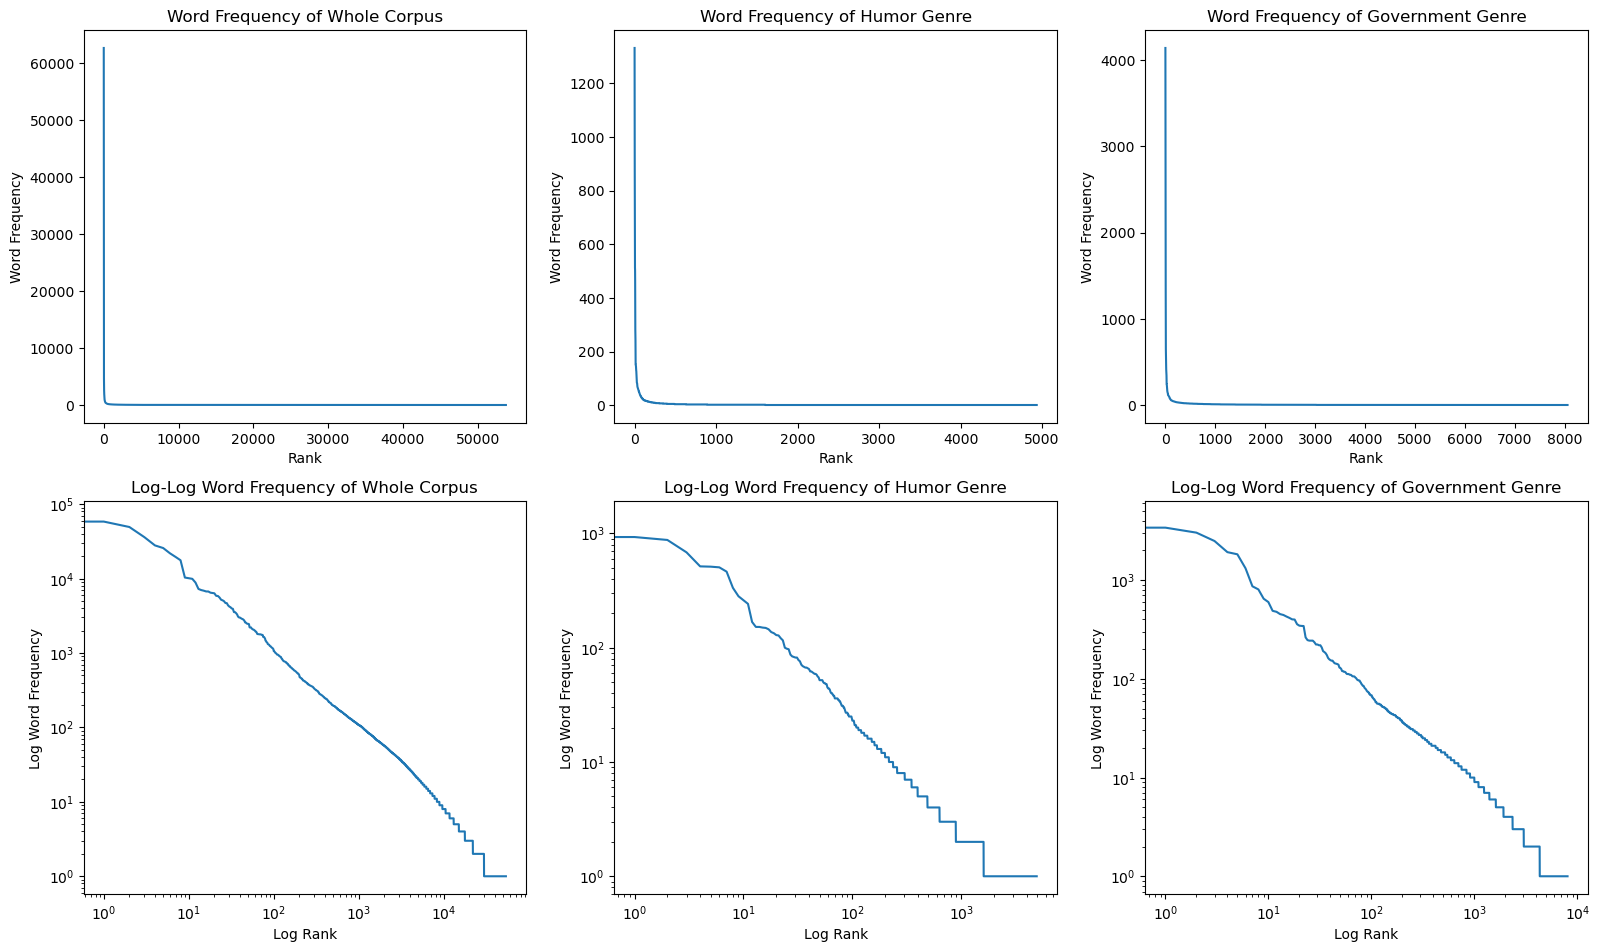

In [89]:
from matplotlib import pyplot as plt 

ordered_word_freq_brown = sorted(token_counter.values(), reverse=True)
ordered_word_freq_humor = sorted(humor_token_counter.values(), reverse=True)
ordered_word_freq_gov = sorted(gov_token_counter.values(), reverse=True)


plt.subplots_adjust(bottom=0.2, top=2, left=0.15, right=2.5)

plt.subplot(2, 3, 1)
plt.title("Word Frequency of Whole Corpus")
plt.ylabel("Word Frequency")
plt.xlabel("Rank")
plt.plot(ordered_word_freq_brown)

plt.subplot(2, 3, 2)
plt.title("Word Frequency of Humor Genre")
plt.ylabel("Word Frequency")
plt.xlabel("Rank")
plt.plot(ordered_word_freq_humor)

plt.subplot(2, 3, 3)
plt.title("Word Frequency of Government Genre")
plt.ylabel("Word Frequency")
plt.xlabel("Rank")
plt.plot(ordered_word_freq_gov)



plt.subplot(2 ,3, 4)
plt.title("Log-Log Word Frequency of Whole Corpus")
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Log Word Frequency")
plt.xlabel("Log Rank")
plt.plot(ordered_word_freq_brown)

plt.subplot(2 ,3, 5)
plt.title("Log-Log Word Frequency of Humor Genre")
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Log Word Frequency")
plt.xlabel("Log Rank")
plt.plot(ordered_word_freq_humor)

plt.subplot(2 ,3, 6)
plt.title("Log-Log Word Frequency of Government Genre")
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Log Word Frequency")
plt.xlabel("Log Rank")
plt.plot(ordered_word_freq_gov)

In [90]:
punctuations = set(word_tokenizer.tokenize(re.sub('[a-zA-Z\d]', '', brown_raw)))
punctuations -  set(re.sub('[a-zA-Z\d]', '', brown_raw).split())

{'./', '/.', '{', '}'}